Student Name (s): 

                  Confidence Ikemsinachi Ahuekwe   Student Number: 991714953 
                  David Gicheru .................................. 991665570
                  IfioK-Obong Sunday Ikpe ........................ 991734876
                  Henry Nnadozie Echeji .......................... 991730116 

In [8]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
sns.set_style('darkgrid')

In [9]:
file1 = '2017.csv'
file2 = '2018.csv'
file3 = '2019.csv'
file4 = '2020.csv'

# Read CSV files into Pandas DataFrames with ISO-8859-1 encoding
df1 = pd.read_csv(file1, encoding='ISO-8859-1')
df2 = pd.read_csv(file2, encoding='ISO-8859-1')
df3 = pd.read_csv(file3, encoding='ISO-8859-1')
df4 = pd.read_csv(file4, encoding='UTF-8')

# Combine all DataFrames into a single DataFrame
df_combine = pd.concat([df1, df2, df3, df4], ignore_index=True)
df_combine.head()

,Library Full Name,Library Number,Survey Year From,A1.3 Ontario Library Service (OLS) Region (English),A1.4 Type of Library Service (English),A1.5 Mailing Address,A1.9 Street Address,A1.10 City/Town,A1.11 Province,A1.12 Postal Code,...,F1.5 Total Annual E-Magazine Downloads / Borrows (Actual Annual Direct Circulation),"H1.2.2 If Yes, provide number of Friends organizations your public library works with.",H1.2.3.F No,H1.2.3.T Yes,"H1.2.4 If Yes, provide number of Foundations your public library works with.",H1.3.2.60 Snapchat,H1.3.2.61 TikTok,"H1.7.3 Please provide highlights or examples of your library’s partnerships with government, including municipal, provincial, and federal governments:",H1.9.3 Please provide highlights or examples of your library’s partnerships with the business and economic sector:,Unnamed: 327
0,Addington Highlands Twp,L0005,2017.0,Southern Ontario Library Service,Public or Union Library,Box 72,3641 Flinton Rd.,Flinton,Ontario,K0H1P0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Adjala-TosorontioTwp,L0003,2017.0,Southern Ontario Library Service,Contracting Municipality,7855 Sideroad 30 R.R. #1,7855 Sideroad 30 R.R. #1,Alliston,Ontario,L9R1V1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Admaston/Bromley Twp,L0002,2017.0,Southern Ontario Library Service,Public or Union Library,Hwy 60 P O Box 130,5346 Highway 60,Douglas,Ontario,K0J1S0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ajax,L0032,2017.0,Southern Ontario Library Service,Public or Union Library,55 Harwood Avenue South,55 Harwood Avenue South,Ajax,Ontario,L1S2H8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alberton Twp,L1098,2017.0,Ontario Library Service - North,Contracting Municipality,3 Highway 611 South RR1B2,3 Highway 611 South RR1B2,Township of Alberton,Ontario,P9A3M2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This Python code reads four CSV files named '2017.csv', '2018.csv', '2019.csv', and '2020.csv' into Pandas DataFrames. Each file is read with a specified encoding. After reading the CSV files, the code combines these DataFrames into a single DataFrame named 'df_combine' using the pd.concat() function with the ignore_index=True parameter.

In [10]:
# shows the last 5 rows in the df_combine dataframe
df_combine.tail()

,Library Full Name,Library Number,Survey Year From,A1.3 Ontario Library Service (OLS) Region (English),A1.4 Type of Library Service (English),A1.5 Mailing Address,A1.9 Street Address,A1.10 City/Town,A1.11 Province,A1.12 Postal Code,...,F1.5 Total Annual E-Magazine Downloads / Borrows (Actual Annual Direct Circulation),"H1.2.2 If Yes, provide number of Friends organizations your public library works with.",H1.2.3.F No,H1.2.3.T Yes,"H1.2.4 If Yes, provide number of Foundations your public library works with.",H1.3.2.60 Snapchat,H1.3.2.61 TikTok,"H1.7.3 Please provide highlights or examples of your library’s partnerships with government, including municipal, provincial, and federal governments:",H1.9.3 Please provide highlights or examples of your library’s partnerships with the business and economic sector:,Unnamed: 327
1493,Whitewater Region,L0482,2020.0,Southern Ontario Library Service,Public or Union Library,20 Cameron Street P.O. Box 159,20 Cameron Street 159,Beachburg,Ontario,K0J1C0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494,Wikwemikong FN,L0426,2020.0,Ontario Library Service - North,First Nations Library,34-A Henry Street,34 Henry Street,Wikwemikong,Ontario,P0P2J0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1495,Windsor,L0378,2020.0,Southern Ontario Library Service,Public or Union Library,850 Ouellette Avenue,NaN,Windsor,Ontario,N9A4M9,...,"105,112",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,Wollaston,L0380,2020.0,Southern Ontario Library Service,Public or Union Library,Hwy 620 P.O. Box 280,2149 Hwy 620,Coe Hill,Ontario,K0L1P0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,Woodstock,L0379,2020.0,Southern Ontario Library Service,Public or Union Library,445 Hunter Street,NaN,Woodstock,Ontario,N4S4G7,...,"2,479",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step1:Write a code which will create an insight to show a table that lists the number of libraries in each city for the last 4 years

In [11]:
# Create a pivot table to count the number of libraries in each city for each year
pivot_table = pd.pivot_table(df_combine, values='Library Full Name', index='A1.10 City/Town', columns='Survey Year From', aggfunc='count', fill_value=0)

# Print the pivot table
print("\nNumber of Libraries in Each City for the Last 4 Years:")
print(pivot_table)


Number of Libraries in Each City for the Last 4 Years:
Survey Year From  2017.0  2018.0  2019.0  2020.0
A1.10 City/Town                                 
Addison                1       1       1       1
Ajax                   1       1       1       1
Alderville             1       0       0       0
Algoma Mills           1       1       1       1
Alliston               2       2       2       2
...                  ...     ...     ...     ...
Wikwemikong            1       1       1       1
Windsor                1       1       1       1
Woodstock              2       2       2       2
Wyoming                1       1       1       1
ear falls              0       1       1       1

[334 rows x 4 columns]


This Python code creates a pivot table to count the number of libraries in each city for each year.This pivot table gives a summarized view of the library counts, organized by city and year. Each cell in the table represents the count of libraries in a specific city for a particular year

In [12]:
#display first five rows of the pivot table
pivot_table.head()

Survey Year From,2017.0,2018.0,2019.0,2020.0
A1.10 City/Town,,,,
Addison,1,1,1,1
Ajax,1,1,1,1
Alderville,1,0,0,0
Algoma Mills,1,1,1,1
Alliston,2,2,2,2


In [13]:
#display last five rows of the pivot table
pivot_table.tail()

Survey Year From,2017.0,2018.0,2019.0,2020.0
A1.10 City/Town,,,,
Wikwemikong,1,1,1,1
Windsor,1,1,1,1
Woodstock,2,2,2,2
Wyoming,1,1,1,1
ear falls,0,1,1,1


In [14]:
#displays general info about the pivot table
pivot_table.info

<bound method DataFrame.info of Survey Year From  2017.0  2018.0  2019.0  2020.0
A1.10 City/Town                                 
Addison                1       1       1       1
Ajax                   1       1       1       1
Alderville             1       0       0       0
Algoma Mills           1       1       1       1
Alliston               2       2       2       2
...                  ...     ...     ...     ...
Wikwemikong            1       1       1       1
Windsor                1       1       1       1
Woodstock              2       2       2       2
Wyoming                1       1       1       1
ear falls              0       1       1       1

[334 rows x 4 columns]>

## Step2:  Write a code that shows the total number of active cardholders for each library for the last 4 years

In [15]:
# Create a pivot table to sum the total number of active cardholders for each library in each year
pivot_table2 = pd.pivot_table(df_combine, values="A1.14  No. of Active Library Cardholders", index='Library Full Name', columns='Survey Year From', aggfunc='sum', fill_value=0)

# Print the pivot table
print("\nTotal Number of Active Cardholders for Each Library for the Last 4 Years:")
print(pivot_table2)


Total Number of Active Cardholders for Each Library for the Last 4 Years:
Survey Year From         2017.0  2018.0  2019.0  2020.0
Library Full Name                                      
Addington Highlands Twp     959     910     910     910
Adjala-TosorontioTwp          0       0       0       0
Admaston/Bromley Twp        369     458     417     366
Ajax                     35,869  34,613  37,004  25,897
Alberton Twp                  0       0       0       0
...                         ...     ...     ...     ...
Whitewater Region         1,377   1,558   1,725   1,756
Wikwemikong FN              773     862     409     780
Windsor                  41,594  60,887  89,393  93,709
Wollaston                   475     163     307     334
Woodstock                12,964  12,818  12,361  12,282

[381 rows x 4 columns]


This Python code creates a pivot table to sum the total number of active cardholders for each library in each year. The printed pivot table shows the total number of active cardholders for each library, organized by library name (rows) and survey year (columns). Each cell in the table represents the sum of active cardholders for a specific library in a particular year. This table provides a consolidated view of the total active cardholders for each library over the specified years.

In [16]:
#first five rows of pivot table
pivot_table2.head()


Survey Year From,2017.0,2018.0,2019.0,2020.0
Library Full Name,,,,
Addington Highlands Twp,959,910,910,910
Adjala-TosorontioTwp,0,0,0,0
Admaston/Bromley Twp,369,458,417,366
Ajax,"35,869","34,613","37,004","25,897"
Alberton Twp,0,0,0,0


In [17]:
#last five rows of pivot table
pivot_table2.tail()

Survey Year From,2017.0,2018.0,2019.0,2020.0
Library Full Name,,,,
Whitewater Region,"1,377","1,558","1,725","1,756"
Wikwemikong FN,773,862,409,780
Windsor,"41,594","60,887","89,393","93,709"
Wollaston,475,163,307,334
Woodstock,"12,964","12,818","12,361","12,282"


In [18]:
# Check the data type of 'No. of Active Library Cardholders'
print(df_combine['A1.14  No. of Active Library Cardholders'].dtype)

object


In [19]:
# Convert the column to numeric if it's not already
df_combine['A1.14  No. of Active Library Cardholders'] = pd.to_numeric(df_combine['A1.14  No. of Active Library Cardholders'], errors='coerce')

# Check the data type again
print(df_combine['A1.14  No. of Active Library Cardholders'].dtype)

float64


In [20]:
#check columns of pivot table
pivot_table.columns

Index([2017.0, 2018.0, 2019.0, 2020.0], dtype='float64', name='Survey Year From')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

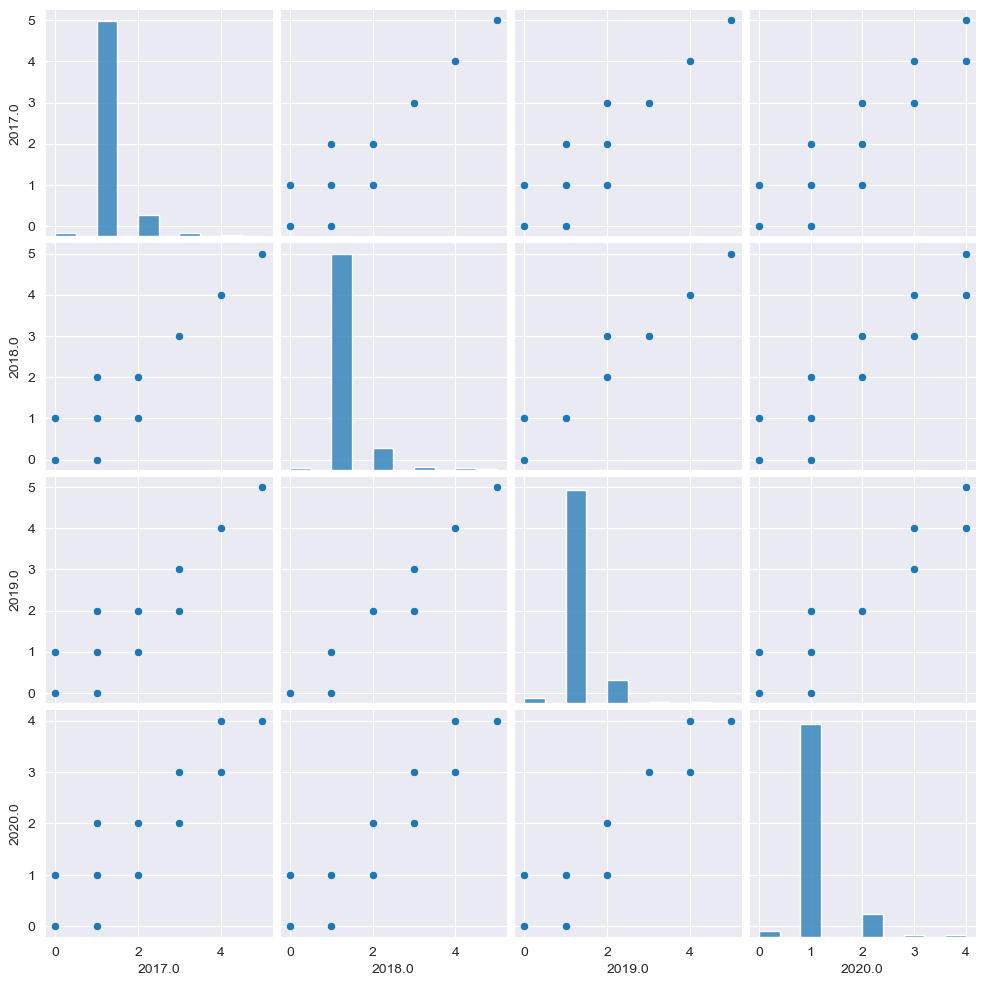

In [21]:
# Exploring the dataset
sns.pairplot(pivot_table)
plt.show

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

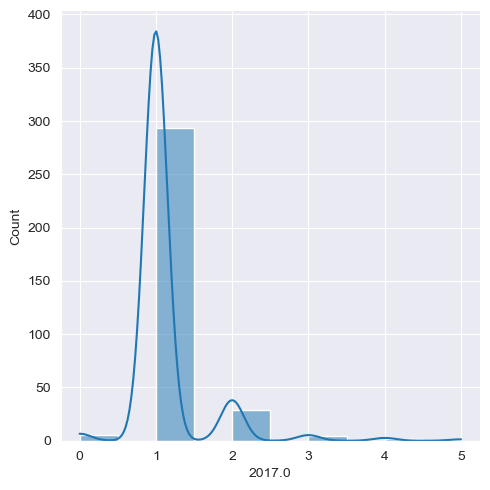

In [22]:
#  create a histogram
sns.displot(pivot_table[2017.0], kde=True) # draws a univariate or bivariate distribution of observations 
plt.show

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

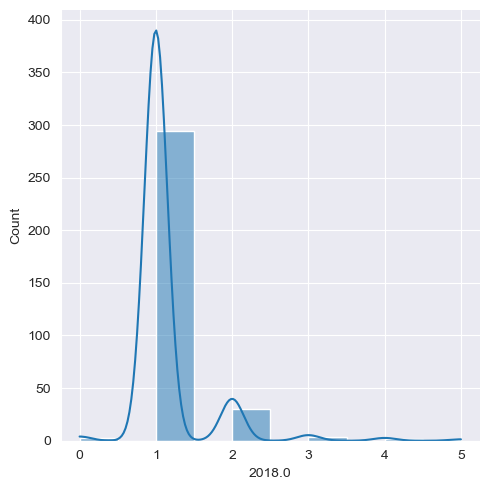

In [23]:
#  create a histogram
sns.displot(pivot_table[2018.0], kde=True) # draws a univariate or bivariate distribution of observations 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

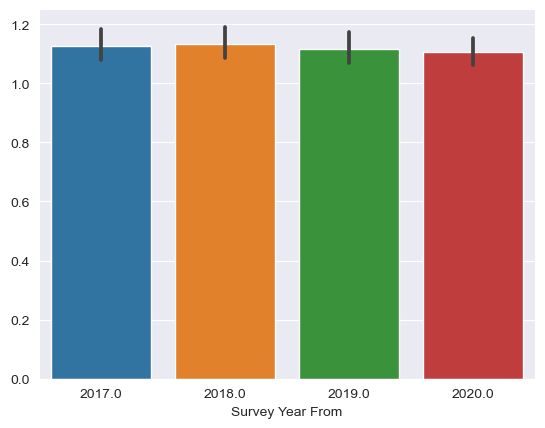

In [24]:
#  create a bar chart
sns.barplot(pivot_table) # draws a univariate or bivariate distribution of observations 
plt.show

The histogram shows the distribution of the total number of active cardholders across all libraries and years. The x-axis represents the total number of active cardholders, and the y-axis represents the frequency of occurrences. Each bar in the histogram corresponds to a range of values, and the height of the bar indicates how many data points fall within that range.

<function matplotlib.pyplot.show(close=None, block=None)>

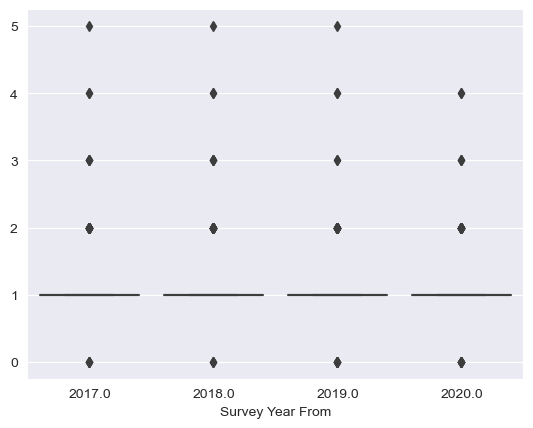

In [49]:
#  create a boxplot to identify outliers
sns.boxplot(pivot_table) # draws a univariate or bivariate distribution of observations 
plt.show

From the boxplots in the graph above we can observe that there is outliers in the four respective years.

## Step3: Write a code that order the top 10 libraries with the highest average Total Operating Revenues from 2017-2020

In [26]:
#getting Total Operating Revenues data
revenue_df = pd.read_csv('revenues.csv', encoding='ISO-8859-1')
revenue_df.head(10)


,Library Full Name,Survey Year From,Total Operating Revenues
0,Addington Highlands Twp,2017,"211,367,610"
1,Adjala-TosorontioTwp,2017,"208,626,879"
2,Admaston/Bromley Twp,2017,"203,099,572"
3,Ajax,2017,"200,042,497"
4,Alberton Twp,2017,"53,179,758"
5,Alderville FN,2017,"48,732,862"
6,Alfred & Plantagenet Twp,2017,"48,595,796"
7,Algonquins of Pikwakanagan FN,2017,"47,786,955"
8,Alnwick/Haldimand Twp,2017,"33,612,981"
9,Amaranth Twp,2017,"33,113,734"


In [27]:
#Check data type of Total Operating Revenues column
print(revenue_df['Total Operating Revenues'].dtype)

object


In [28]:
#handle commas that would interrupt computations
revenue_df['Total Operating Revenues'] = revenue_df['Total Operating Revenues'].str.replace(',', '')

In [29]:
#convert column to numeric to enable us compute the mean
revenue_df['Total Operating Revenues'] = pd.to_numeric(revenue_df['Total Operating Revenues'], errors='coerce')

In [30]:

# Group by 'Library Full Name' and calculate the average revenue for each library
avg_revenue_by_library = revenue_df.groupby('Library Full Name')['Total Operating Revenues'].mean()

# Get the top ten libraries with the highest average revenue
top_10_libraries = avg_revenue_by_library.nlargest(10)

print(top_10_libraries)

Library Full Name
Addington Highlands Twp          53074140.50
Adjala-TosorontioTwp             52388841.75
Admaston/Bromley Twp             51006294.50
Ajax                             50240650.75
Alberton Twp                     13523573.25
Alderville FN                    12411239.50
Alfred & Plantagenet Twp         12375599.25
Algonquins of Pikwakanagan FN    12172659.75
Alnwick/Haldimand Twp             8628429.75
Amaranth Twp                      8502577.25
Name: Total Operating Revenues, dtype: float64


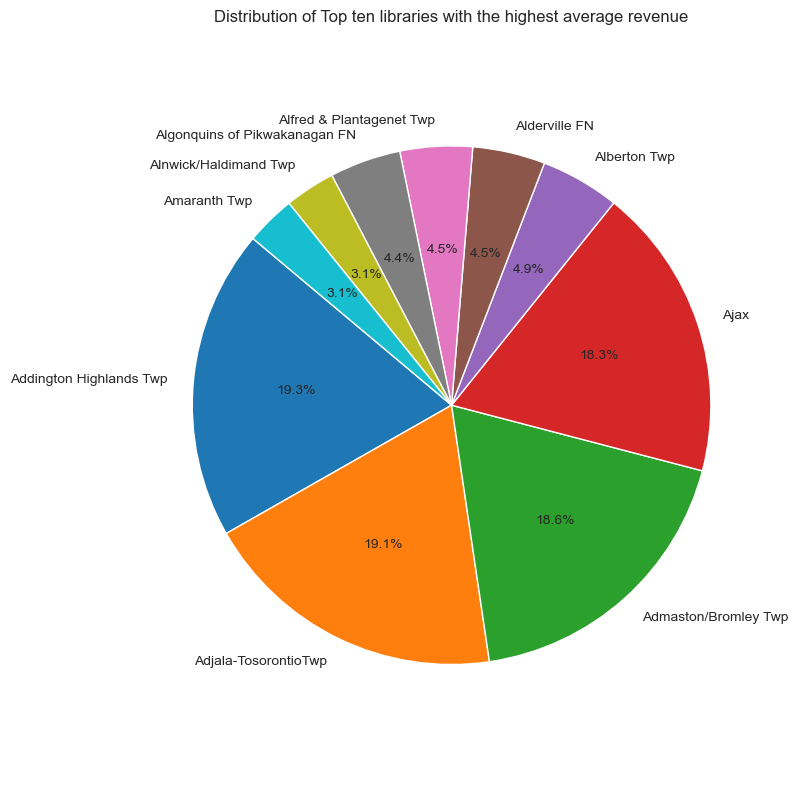

In [31]:

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size

# Plot the pie chart
plt.pie(top_10_libraries, labels=top_10_libraries.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Top ten libraries with the highest average revenue')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.tight_layout()
plt.show()


The resulting pie chart visually represents the proportion of total operating revenues contributed by each of the top ten libraries with the highest average revenue. Each wedge of the pie corresponds to a library, and the size of the wedge represents the percentage of the total. The autopct parameter displays the percentage on each wedge.

## Step4:  Create a new metric (column) to compare libraries across Ontario (for example, operating revenue per active card holder)

In [32]:

#Load dataset to get revenue and cardholders
revpercard_df = pd.read_csv('revpercard.csv')


In [33]:
#display 1st rows of the dataframe
revpercard_df.head()

,Library Full Name,Total Operating Revenues,No. of Active Library Cardholders
0,Addington Highlands Twp,"211,367,610",959
1,Adjala-TosorontioTwp,"208,626,879",0
2,Admaston/Bromley Twp,"203,099,572",369
3,Ajax,"200,042,497","35,869"
4,Alberton Twp,"53,179,758",0


In [34]:
#Checking for data type of Total Operating Revenues
print(revpercard_df['Total Operating Revenues'].dtype)

object


In [35]:
#Checking for data type of No. of Active Library Cardholders
print(revpercard_df['No. of Active Library Cardholders'].dtype)

object


In [36]:
#handle commas that would interrupt computations
revpercard_df['Total Operating Revenues'] = revpercard_df['Total Operating Revenues'].str.replace(',', '')
revpercard_df['No. of Active Library Cardholders'] = revpercard_df['No. of Active Library Cardholders'].str.replace(',', '')


In [37]:
#convert column to numeric to enable us create the Operating Revenue per Cardholder column
revpercard_df['Total Operating Revenues'] = pd.to_numeric(revpercard_df['Total Operating Revenues'], errors='coerce')
revpercard_df['No. of Active Library Cardholders'] = pd.to_numeric(revpercard_df['No. of Active Library Cardholders'], errors='coerce')


In [38]:

# Creating the  new metric: operating revenue per active cardholder
revpercard_df['Operating Revenue per Cardholder'] = revpercard_df['Total Operating Revenues'] /revpercard_df['No. of Active Library Cardholders']



In [39]:
#display showing top rows of df
revpercard_df.head()

,Library Full Name,Total Operating Revenues,No. of Active Library Cardholders,Operating Revenue per Cardholder
0,Addington Highlands Twp,211367610,959,2.204042e+05
1,Adjala-TosorontioTwp,208626879,0,inf
2,Admaston/Bromley Twp,203099572,369,5.504053e+05
3,Ajax,200042497,35869,5.577030e+03
4,Alberton Twp,53179758,0,inf


In [40]:
# Convert 'Operating Revenue per Cardholder' column to the desired format and assign back to the column
revpercard_df['Operating Revenue per Cardholder'] = revpercard_df['Operating Revenue per Cardholder'].apply(lambda x: '{:,.1f}'.format(x))


In [41]:
#display showing top rows of df
revpercard_df.head()

,Library Full Name,Total Operating Revenues,No. of Active Library Cardholders,Operating Revenue per Cardholder
0,Addington Highlands Twp,211367610,959,"220,404.2"
1,Adjala-TosorontioTwp,208626879,0,inf
2,Admaston/Bromley Twp,203099572,369,"550,405.3"
3,Ajax,200042497,35869,"5,577.0"
4,Alberton Twp,53179758,0,inf


In [42]:
#display general info on the operating revenue per cardholder
revpercard_df.info

<bound method DataFrame.info of             Library Full Name  Total Operating Revenues  \
0     Addington Highlands Twp                 211367610   
1        Adjala-TosorontioTwp                 208626879   
2        Admaston/Bromley Twp                 203099572   
3                        Ajax                 200042497   
4                Alberton Twp                  53179758   
...                       ...                       ...   
1492        Whitewater Region                       248   
1493           Wikwemikong FN                       248   
1494                  Windsor                       248   
1495                Wollaston                       248   
1496                Woodstock                         0   

      No. of Active Library Cardholders Operating Revenue per Cardholder  
0                                   959                        220,404.2  
1                                     0                              inf  
2                                 

In [43]:
# Summary statistics of the numerical columns of revenue per cardholder table
revpercard_df.describe()

,Total Operating Revenues,No. of Active Library Cardholders
count,1.497000e+03,1497.000000
mean,1.991234e+06,11996.984636
std,1.138681e+07,53795.660174
min,0.000000e+00,0.000000
25%,3.119600e+04,143.000000
50%,1.483890e+05,1000.000000
75%,7.637100e+05,6247.000000
max,2.113676e+08,937518.000000


In [44]:
#number of libraries with zero card holders
zero_cardholders_count = revpercard_df[revpercard_df['No. of Active Library Cardholders'] == 0].shape[0]

print("Number of libraries with zero cardholders:", zero_cardholders_count)



Number of libraries with zero cardholders: 270


In [45]:
# Drop rows with zero active library cardholders
revpercard_df = revpercard_df[revpercard_df['No. of Active Library Cardholders'] != 0]

# Verify the changes
revpercard_df.head()


,Library Full Name,Total Operating Revenues,No. of Active Library Cardholders,Operating Revenue per Cardholder
0,Addington Highlands Twp,211367610,959,"220,404.2"
2,Admaston/Bromley Twp,203099572,369,"550,405.3"
3,Ajax,200042497,35869,"5,577.0"
5,Alderville FN,48732862,232,"210,055.4"
6,Alfred & Plantagenet Twp,48595796,1776,"27,362.5"


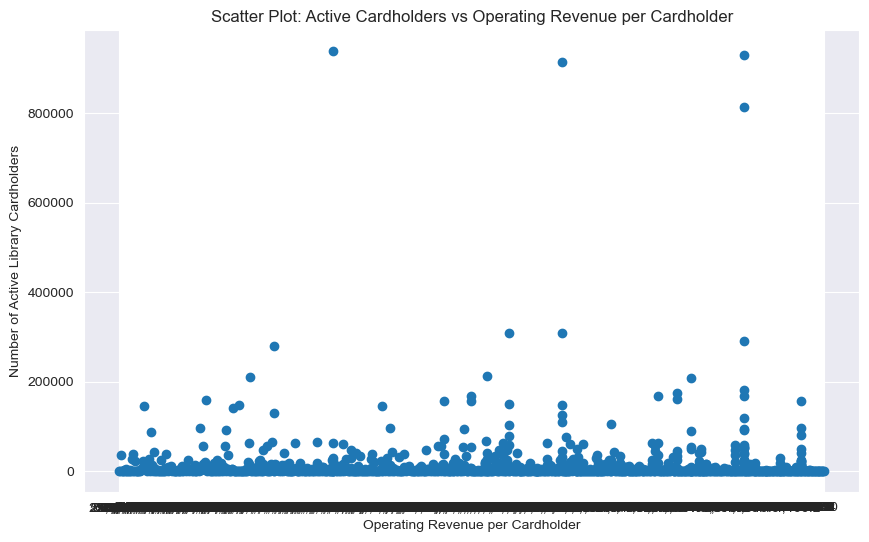

In [46]:
#a scatterplot showing active cardholders and operating revenue per cardholder
plt.figure(figsize=(10, 6)) 
plt.scatter(revpercard_df['Operating Revenue per Cardholder'], revpercard_df['No. of Active Library Cardholders'])
plt.title('Scatter Plot: Active Cardholders vs Operating Revenue per Cardholder')
plt.xlabel('Operating Revenue per Cardholder')
plt.ylabel('Number of Active Library Cardholders')
plt.show()


This scatter plot shows the relationship between the number of active cardholders and the operating revenue per cardholder. The data points are scattered across the plot, with a higher concentration of points towards the bottom left corner. This suggests that there is a weak negative correlation between the two variables, meaning that as the number of active cardholders increases, the operating revenue per cardholder decreases. The x-axis represents the operating revenue per cardholder and the y-axis represents the number of active cardholders. The plot is titled "Scatter Plot: Active Cardholders vs Operating Revenue per Cardholder". The x-axis is labeled "Operating Revenue per Cardholder" and the y-axis is labeled "Number of Active Cardholders". The x-axis ranges from 0 to 1000 and the y-axis ranges from 0 to 800000.

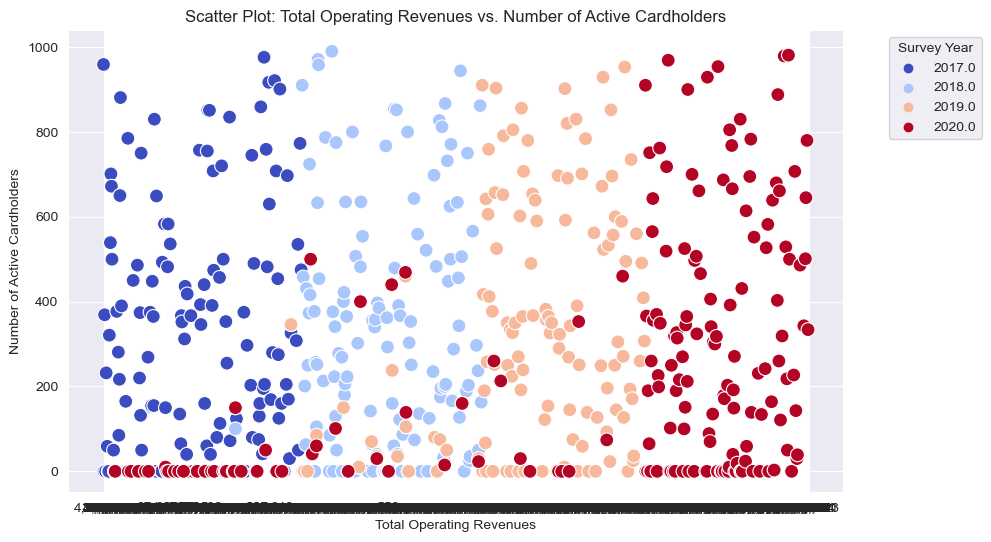

In [48]:
#a scatter plot showing total operating revenues and number of active cardholders over the 4 years
plt.figure(figsize=(10, 6))
sns.scatterplot(x='B2.9  Total Operating Revenues', y='A1.14  No. of Active Library Cardholders', data=df_combine, hue='Survey Year From', palette='coolwarm', s=100)
plt.title('Scatter Plot: Total Operating Revenues vs. Number of Active Cardholders')
plt.xlabel('Total Operating Revenues')
plt.ylabel('Number of Active Cardholders')
plt.legend(title='Survey Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


From this scatter plot, we see the distribution of operating revenues as per active cardholders over the 4 year duration. We can observe that 2017,where operating revenues were low the number of active holders was high. We observe that in the  year 2020,with most of the plots being on the right most. Indicating that operating revenues were high but so was the number of active card holders.  

In [56]:
#getting total revenues for each year
total_revenues_by_year = revenue_df.groupby('Survey Year From')['Total Operating Revenues'].sum()

# Print the result
print(total_revenues_by_year)


Survey Year From
2017    2805501061
2018     143034130
2019      28876794
2020       3465652
Name: Total Operating Revenues, dtype: int64


In [62]:
#This will print a tuple representing the number of rows and columns in the DataFrame
total_revenues_by_year.shape

(4,)

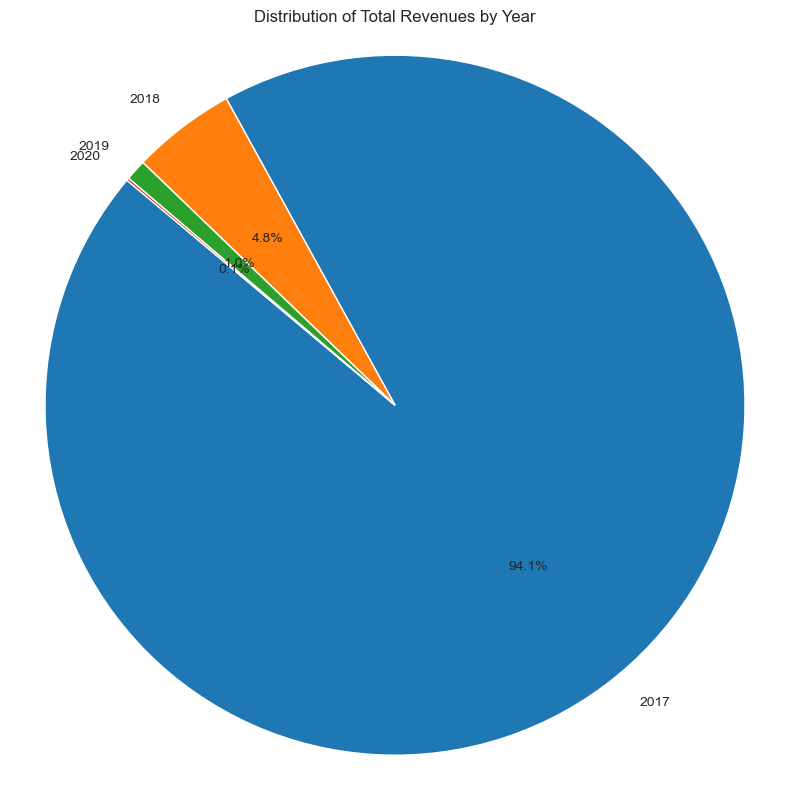

In [68]:

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size

# Plot the pie chart
plt.pie(total_revenues_by_year, labels=total_revenues_by_year.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Total Revenues by Year')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.tight_layout()
plt.show()

From the pie chart we can observe that 2017 was the year with the highest operating revenue, while 2020 generated the least amount of revenue.